<a href="https://colab.research.google.com/github/SeunghyeChae/CAKD3_tmdhey/blob/main/dl_using_a_pretrained_convnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


- 그냥 하면선형
- relu해주면 비선형으로 변환
- 입력값이 0보다 작으면 0으로 출력, 0보다 크면 입력값 그대로 출력하는 유닛
- 171p

- 2진분류 sigmoid 
- 3분류 이상 softmax 

In [ ]:
# imageNet 데이터셋에 훈련된 이미지 분류 모델 
# 우리는 VGG16 (사전 훈련된 네트워크)

from tensorflow.keras.applications import VGG16
conv_base= VGG16(weights='imagenet', # 가중치
                 include_top= False, # 완전연결층에 연결할 것인지
                  input_shape= (150,150,3))


58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
# 우리가 가져온 convnet보기 
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [ ]:
# 완전연결층에 연결하여 사용 
# 2가지 방법 -  데이터증식 / 증식없이

In [ ]:
# # 데이터 증식을 사용하지 않는 빠른 특성추출 
# import os
# import numpy as np 
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# base_dir= ''

# train_dir= os.path.join(base_dir, 'train')
# validation_dir = os.path.join(base_dir, 'validation')
# test_dir = os.path.join(base_dir,'test')

# datagen = ImageDataGenerator(rescale=1./255)
# batch_size= 20

# def extract_features(directory, sample_count):
#   features = np.zeros(shape=(sample_count, 4, 4, 512))
#   labels = np.zeros(shape=(sample_cuont))
#   generator = datagen.flow_from_directory(
#       directory,
#       target_size(150,150),
#       batch_size = batch_size,
#       class_mode = 'binary')
#   i=0
#   for input_batch, labels_batch in generator:
#     features_batch = conv_base.predict(input_batch)
#     features[i*batch_size: (i+1)*batch_size]= features_batch
#     labels[i*batch_size: (i+1)*batch_size]= labels_batch
#     i += 1
#     if i * batch_size >= sample_count:
#       break
#     return features

# train_features, train_labels= extract_features(train_dir,2000)
# validation_features, validation_labels = extract_features(validation_dir,1000)
# test_features, test_labels = extract_features(test_dir,1000)


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/drive/MyDrive/cakd_colab/dl_keras/datasets/cats_and_dogs_small'

train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir,'test')

datagen = ImageDataGenerator( rescale = 1./255)
batch_size = 20

# 특징을 추출하는 definition
def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(
      directory,
      target_size = (150,150),
      batch_size = batch_size,
      class_mode = 'binary'
  )
  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size : ( i + 1 ) * batch_size] = features_batch
    labels[i * batch_size : ( i + 1 ) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= sample_count:
      break
  return features, labels

train_features, train_labels = extract_features(train_dir,2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
train_features.shape
validation_features.shape
test_features.shape


(1000, 4, 4, 512)

In [ ]:
train_features = np.reshape(train_features, (2000,4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))
test_features = np.reshape(test_features,(1000,4*4*512))

In [ ]:
train_features.shape

(2000, 8192)

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation = 'sigmoid'))



model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss = 'binary_crossentropy',
              metrics=['acc'])



history = model.fit(train_features, train_labels,
                    epochs=30,
                    batch_size=20,
                    validation_data=(validation_features, validation_labels))




/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/30
100/100 [==============================] - 1s 4ms/step - loss: 0.6247 - acc: 0.6550 - val_loss: 0.4586 - val_acc: 0.8180
Epoch 2/30
100/100 [==============================] - 0s 3ms/step - loss: 0.4468 - acc: 0.7970 - val_loss: 0.3710 - val_acc: 0.8580
Epoch 3/30
100/100 [==============================] - 0s 3ms/step - loss: 0.3638 - acc: 0.8500 - val_loss: 0.3275 - val_acc: 0.8760
Epoch 4/30
100/100 [==============================] - 0s 3ms/step - loss: 0.3140 - acc: 0.8785 - val_loss: 0.3029 - val_acc: 0.8790
Epoch 5/30
100/100 [==============================] - 0s 3ms/step - loss: 0.2979 - acc: 0.8750 - val_loss: 0.2844 - val_acc: 0.8910
Epoch 6/30
100/100 [==============================] - 0s 3ms/step - loss: 0.2679 - acc: 0.8875 - val_loss: 0.2756 - val_acc: 0.8880
Epoch 7/30
100/100 [==============================] - 0s 3ms/step - loss: 0.2494 - acc: 0.9020 - val_loss: 0.2724 - val_acc: 0.8850
Epoch 8/30
100/100 [==============================] - 0s 3ms/step - loss: 0.

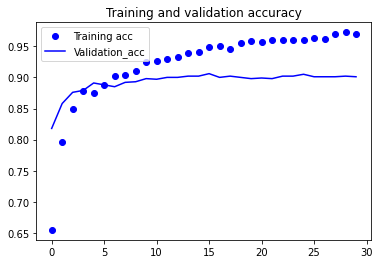

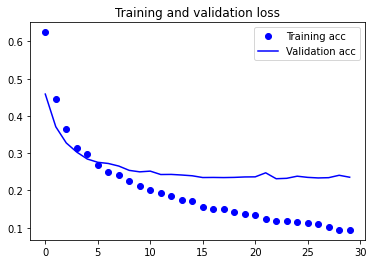

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation_acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.figure()

plt.plot(epochs, loss, 'bo',label = 'Training acc')
plt.plot(epochs, val_loss, 'b',label = 'Validation acc')
plt.title('Training and validation loss')
plt.legend()

plt.show()





In [ ]:
# 데이타 증식 기법 사용

from tensorflow.keras import models
from tensorflow.keras import layers

model= models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import os
import numpy as np
from tensorflow.keras import optimizers

base_dir = '/content/drive/MyDrive/cakd_colab/dl_keras/datasets/cats_and_dogs_small'

train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir,'test')

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train 데이터 증식 (테스트는 하면 안됨)
train_datagen = ImageDataGenerator(rescale= 1./255,# 부동소수점으로 바꿔주고 255로 나눠주기
                                   rotation_range=20,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   fill_mode='nearest')    # p194

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, 
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')


validation_generator=test_datagen.flow_from_directory(validation_dir,
                                                      target_size=(150,150),
                                                      batch_size=20,
                                                      class_mode='binary')


model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5),metrics=['acc'])

history = model.fit_generator(train_generator, steps_per_epoch = 100,
                              epochs=30,
                              validation_data = validation_generator,
                              validation_steps=50,
                              verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 - 1407s - loss: 0.3834 - acc: 0.8080 - val_loss: 0.1729 - val_acc: 0.9330
Epoch 2/30
100/100 - 18s - loss: 0.1976 - acc: 0.9125 - val_loss: 0.1963 - val_acc: 0.9200
Epoch 3/30
100/100 - 19s - loss: 0.1403 - acc: 0.9415 - val_loss: 0.1214 - val_acc: 0.9490
Epoch 4/30
100/100 - 19s - loss: 0.1128 - acc: 0.9565 - val_loss: 0.1011 - val_acc: 0.9610
Epoch 5/30
100/100 - 18s - loss: 0.0896 - acc: 0.9670 - val_loss: 0.1135 - val_acc: 0.9540
Epoch 6/30
100/100 - 18s - loss: 0.0666 - acc: 0.9745 - val_loss: 0.0994 - val_acc: 0.9580
Epoch 7/30
100/100 - 19s - loss: 0.0547 - acc: 0.9795 - val_loss: 0.1062 - val_acc: 0.9630
Epoch 8/30
100/100 - 18s - loss: 0.0605 - acc: 0.9845 - val_loss: 0.1030 - val_acc: 0.9630
Epoch 9/30
100/100 - 18s - loss: 0.0485 - acc: 0.9830 - val_loss: 0.1189 - val_acc: 0.9520
Epoch 10/30
100/100 - 18s - loss: 0.0428 - acc: 0.9835 - val_loss: 0.1258 - val_acc: 0.9500
Epoch 11/30
100/100 - 18s - loss: 0.0360 - acc: 0.9855 - val_loss: 0.1817 - val_acc: 0.

In [ ]:
model.save('/content/drive/MyDrive/cakd_colab/dl_keras/cats_and_dogs_small_3.h5')

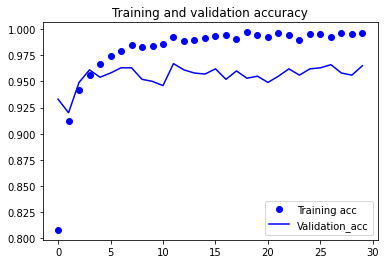

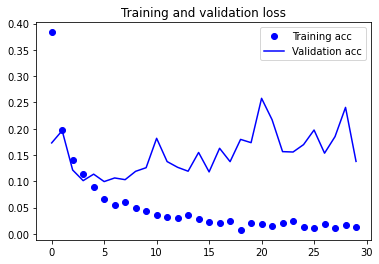

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation_acc')
plt.title('Training and validation accuracy')
plt.legend()


plt.figure()

plt.plot(epochs, loss, 'bo',label = 'Training acc')
plt.plot(epochs, val_loss, 'b',label = 'Validation acc')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [ ]:
conv_base.trainable= True

set_trainable= False
for layer in conv_base.layers:
  if layer.name == 'bolck5_conv1':
    set_trainable= True
  if set_trainable:
    layer.trainable= True
  else:
    layer.trainable= False
    

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer= optimizers.RMSprop(learning_rate= 1e-5),
              metrics=['acc'])

history= model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data= validation_generator,
    validation_steps=50
)

Epoch 1/100
100/100 [==============================] - 19s 181ms/step - loss: 0.0020 - acc: 0.9995 - val_loss: 0.1449 - val_acc: 0.9630
Epoch 2/100
100/100 [==============================] - 18s 180ms/step - loss: 9.0167e-04 - acc: 1.0000 - val_loss: 0.1523 - val_acc: 0.9630
Epoch 3/100
100/100 [==============================] - 18s 178ms/step - loss: 0.0012 - acc: 1.0000 - val_loss: 0.1585 - val_acc: 0.9650
Epoch 4/100
100/100 [==============================] - 18s 179ms/step - loss: 0.0017 - acc: 0.9995 - val_loss: 0.1561 - val_acc: 0.9620
Epoch 5/100
100/100 [==============================] - 18s 180ms/step - loss: 0.0040 - acc: 0.9980 - val_loss: 0.1553 - val_acc: 0.9690
Epoch 6/100
100/100 [==============================] - 18s 178ms/step - loss: 6.7033e-04 - acc: 1.0000 - val_loss: 0.1582 - val_acc: 0.9640
Epoch 7/100
100/100 [==============================] - 18s 179ms/step - loss: 0.0062 - acc: 0.9990 - val_loss: 0.1620 - val_acc: 0.9620
Epoch 8/100
100/100 [===================

In [ ]:

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs,acc,'bo',label='Training acc')
plt.plot(epochs,val_acc,'b',label='Validation_acc')
plt.title('Training and validation accuracy')
plt.legend()


plt.figure()

plt.plot(epochs, loss, 'bo',label = 'Training acc')
plt.plot(epochs, val_loss, 'b',label = 'Validation acc')
plt.title('Training and validation loss')
plt.legend()

plt.show()


NameError: ignored